# 1. Import libraries

In [48]:
! pip install nbconvert

In [9]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pdfplumber
from utils import Utilities as utl
from DataVisualizerSeaborn import DataVisualizer as dv
import warnings
warnings.filterwarnings('ignore')


# 2. Load the processed data

In [3]:
# Main data source file
data = pd.read_csv('data.csv')
# Received funds
received = pd.read_csv('paid_in_funds.csv')
clean_received = pd.read_csv('cleaned_received.csv')
clean_received_sorted = pd.read_csv('clean_received_sorted.csv')
received_grouped_by_phone_number = pd.read_csv('received_grouped_by_phone_number.csv')
# Transfered funds
transfered = pd.read_csv('transfer_out_funds.csv')
clean_transfered = pd.read_csv('cleaned_transfered.csv')
clean_transfered_sorted = pd.read_csv('clean_transfered_sorted.csv')
transfered_grouped_by_phone_number = pd.read_csv('transfered_grouped_by_phone_number.csv')
# Direct deposits
direct_deposits = pd.read_csv('direct_deposits.csv')
deposits_grouped_by_details = pd.read_csv('direct_deposits_grouped_by_details.csv')
# M-shwari withdrawals
mshwari_withdrawals = pd.read_csv('mshwari_withdrawals.csv')
# M-shwari deposits
mshwari_deposits = pd.read_csv('mshwari_deposits.csv')
# Business payments
business_payment_grouped_by_details = pd.read_csv('business_payments.csv')
# Bill and Utilities Kenya Power KPLC
kenya_power_bill = pd.read_csv('kenya_power_bill_grouped_by_receipt_no.csv')
# Safaricom bill
safaricom_bill = pd.read_csv('safaricom_bill.csv')

# 3. Basic analysis

In [4]:
# Total number of transactions
total_transactions = len(data)
print("Total Transactions: ", total_transactions)

# Total Paid In
total_paid_in = data["Paid In"].sum()
print("Total Paid In: ", total_paid_in)

# Total Withdrawn
total_withdrawn = data["Withdrawn"].sum()
print("Total Withdrawn: ", total_withdrawn)

# Final Balance
initial_balance = data["Balance"].iloc[-1]
print("Initial Balance: ", initial_balance)
# Final Balance
final_balance = data["Balance"].iloc[1]
print("Final Balance: ", final_balance)

Total Transactions:  5029
Total Paid In:  259667.0
Total Withdrawn:  260462.0
Initial Balance:  141.0
Final Balance:  20.0


# 4. Visualization

## a. Balance trend over time

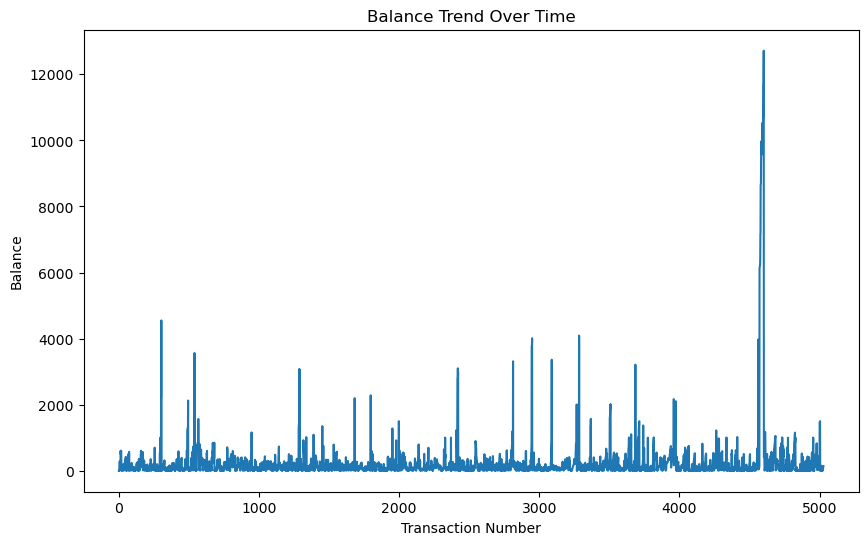

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x=range(len(data)), y="Balance")
plt.title("Balance Trend Over Time")
plt.xlabel("Transaction Number")
plt.ylabel("Balance")
plt.show()

## b. Total paid in vs withdrawn

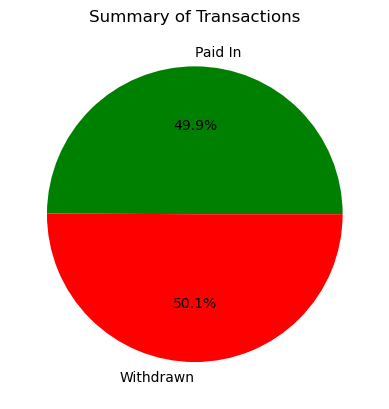

In [8]:
# Summarize paid in and withdrawn amounts
summary = data[['Paid In', 'Withdrawn']].sum()
summary.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], labels=['Paid In', 'Withdrawn'])
plt.title('Summary of Transactions')
plt.ylabel('')
plt.show()

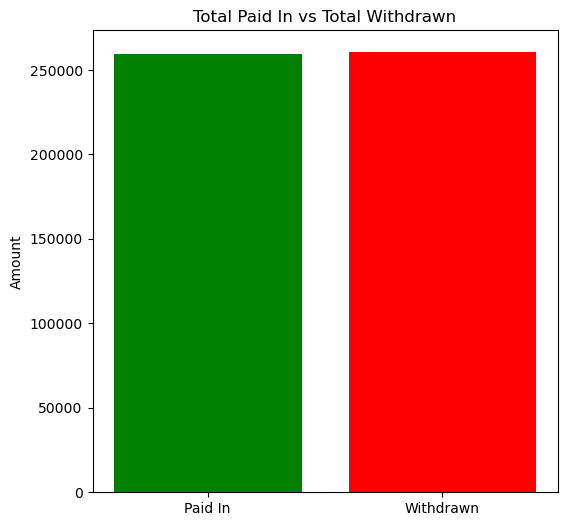

In [7]:
totals = {"Paid In": total_paid_in, "Withdrawn": total_withdrawn}
plt.figure(figsize=(6, 6))
plt.bar(totals.keys(), totals.values(), color=["green", "red"])
plt.title("Total Paid In vs Total Withdrawn")
plt.ylabel("Amount")
plt.show()

## 5. Top Sources of Incoming Payments and Withdrawals

### a. Top 10 sources of incoming payments

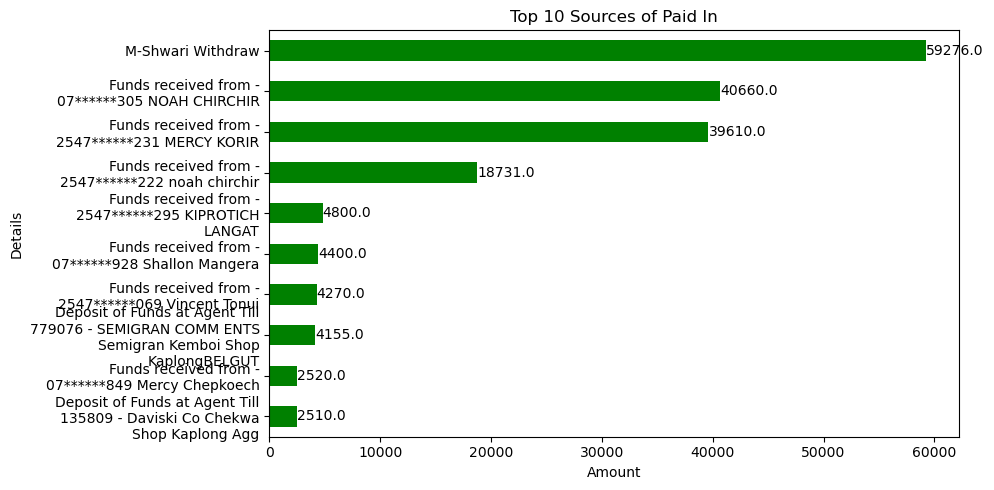

In [37]:
# Top 10 sources of Paid In (sorted for descending order)
top_paid_in_sources = received.groupby('Details')['Paid In'].sum().nlargest(10).sort_values(ascending=True)

# set the figure size
plt.figure(figsize =(10,5))
# Create the horizontal bar chart
ax = top_paid_in_sources.plot(kind='barh', color='green')
plt.title('Top 10 Sources of Paid In')
plt.xlabel('Amount')

# Add values at the end of each bar
for index, value in enumerate(top_paid_in_sources):
    plt.text(value, index, f'{value}', va='center', ha='left')  # Positioning the text

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### b. Top 10 receipients of outgoing payments

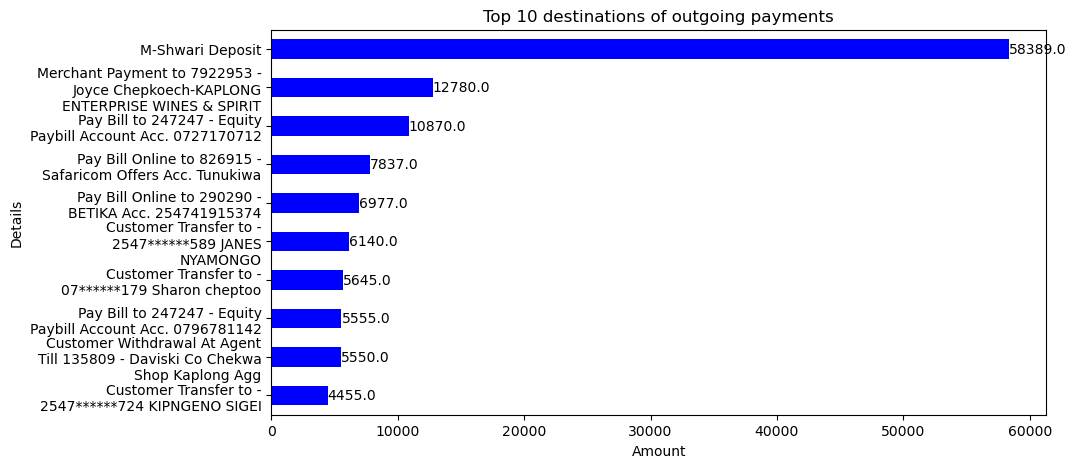

In [39]:
# Top 10 sources of Paid In (sorted for descending order)
top_paid_in_sources = transfered.groupby('Details')['Withdrawn'].sum().nlargest(10).sort_values(ascending=True)

# set the figure size
plt.figure(figsize =(10,5))
# Create the horizontal bar chart
ax = top_paid_in_sources.plot(kind='barh', color='blue')
plt.title('Top 10 destinations of outgoing payments')
plt.xlabel('Amount')

# Add values at the end of each bar
for index, value in enumerate(top_paid_in_sources):
    plt.text(value, index, f'{value}', va='center', ha='left')  # Positioning the text

#plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [47]:
transfered_grouped_by_phone_number.head(10)

,Name,Phone Number,Withdrawn
0,JANES\nNYAMONGO,2547******589,6140.0
1,Sharon cheptoo,07******179,5645.0
2,KIPNGENO SIGEI,2547******724,4455.0
3,Vincent Tonui,2547******069,4294.0
4,MERCY CHERONO,07******430,4255.0
5,Collins Kipkorir,2547******320,3412.0
6,Edna Nyole,2547******593,3035.0
7,Mercy Chepkoech,07******849,2650.0
8,JACKLINE\nCHEPKOECH,2547******312,2650.0
9,EMMANUEL\nKIPKIRUI,2547******992,2320.0


## Analyse withdrawals on a specific date

In [ ]:
specific_date = "2024-11-23"  # Change this to the desired date
transactions_on_date = transactions[transactions["Completion Time"].str.contains(specific_date, na=False)]
print(transactions_on_date)